<a href="https://colab.research.google.com/github/wolfzxcv/ml-examples/blob/master/autonomous_car_maintenance_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

# Step 1: Create and save a sample dataset
data = {
    'engine_temp': [85, 90, 75, 100, 65, 80, 95, 70, 105, 60],
    'oil_level': [75, 70, 80, 65, 85, 78, 68, 82, 60, 88],
    'tire_pressure': [32, 30, 34, 29, 35, 33, 31, 36, 28, 37],
    'battery_voltage': [12.5, 12.3, 12.8, 12.1, 12.6, 12.4, 12.2, 12.9, 11.9, 13.0],
    'fuel_consumption': [8, 7.5, 9, 7, 8.5, 8.2, 7.8, 9.1, 6.9, 9.5],
    'maintenance_required': [1, 0, 0, 1, 0, 0, 1, 0, 1, 0]
}

df = pd.DataFrame(data)
df.to_csv('vehicle_maintenance_data.csv', index=False)

# Step 2: Load and preprocess data
data = pd.read_csv('./vehicle_maintenance_data.csv')
data = data.fillna(method='ffill')
data['engine_efficiency'] = data['engine_temp'] / data['fuel_consumption']

features = data[['engine_temp', 'oil_level', 'tire_pressure', 'battery_voltage', 'engine_efficiency']]
target = data['maintenance_required']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Step 3: Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 4: Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Add zero_division=1 to handle the UndefinedMetricWarning
print(classification_report(y_test, y_pred, zero_division=1))

print('\nConfusion Matrix:')
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['No Maintenance Required', 'Maintenance Required'], columns=['No Maintenance Required', 'Maintenance Required'])
conf_matrix_df.index.name = "True Label"
conf_matrix_df.columns.name = "Predicted Label"
print(conf_matrix_df)

new_data = pd.DataFrame({
    'engine_temp': [85],
    'oil_level': [75],
    'tire_pressure': [32],
    'battery_voltage': [12.5],
    'engine_efficiency': [85 / 8]
})

prediction = model.predict(new_data)
print(f'Maintenance Required: {bool(prediction[0])}')

Accuracy: 50.00%
              precision    recall  f1-score   support

           0       1.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.75      0.50      0.33         2
weighted avg       0.75      0.50      0.33         2


Confusion Matrix:
Predicted Label          No Maintenance Required  Maintenance Required
True Label                                                            
No Maintenance Required                        0                     1
Maintenance Required                           0                     1
Maintenance Required: True


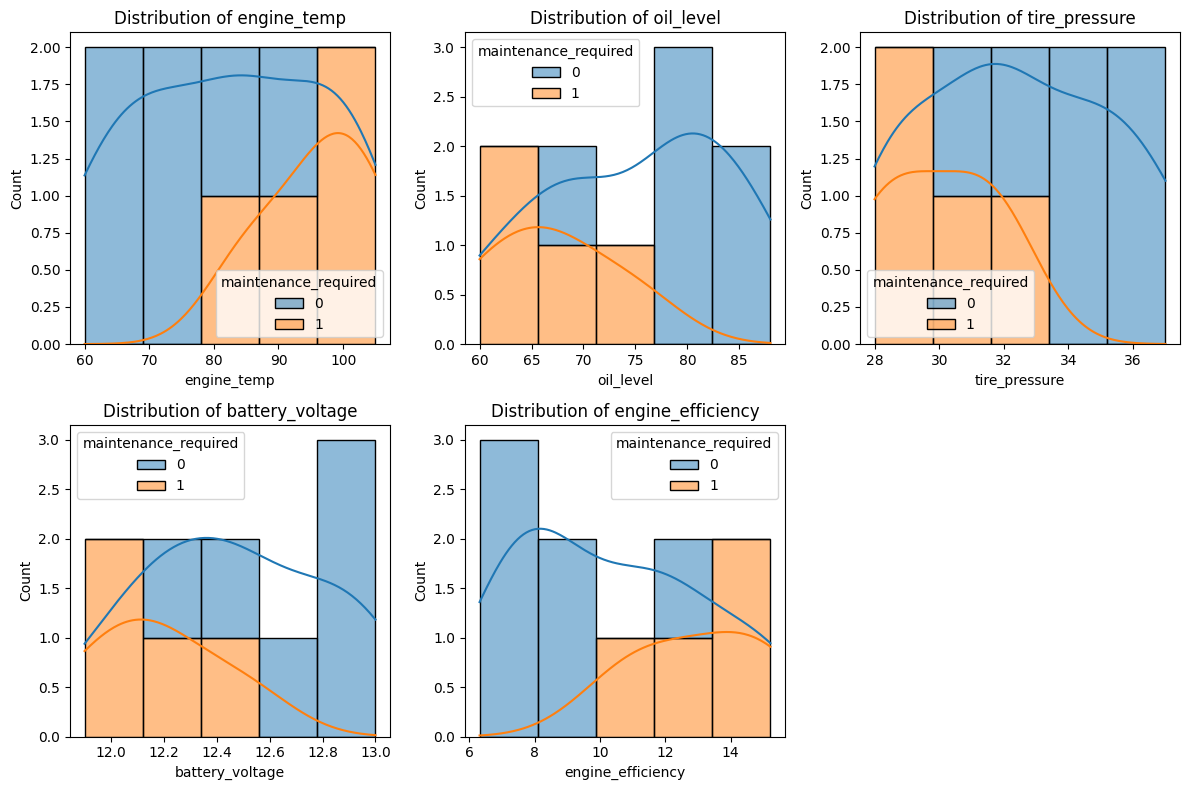

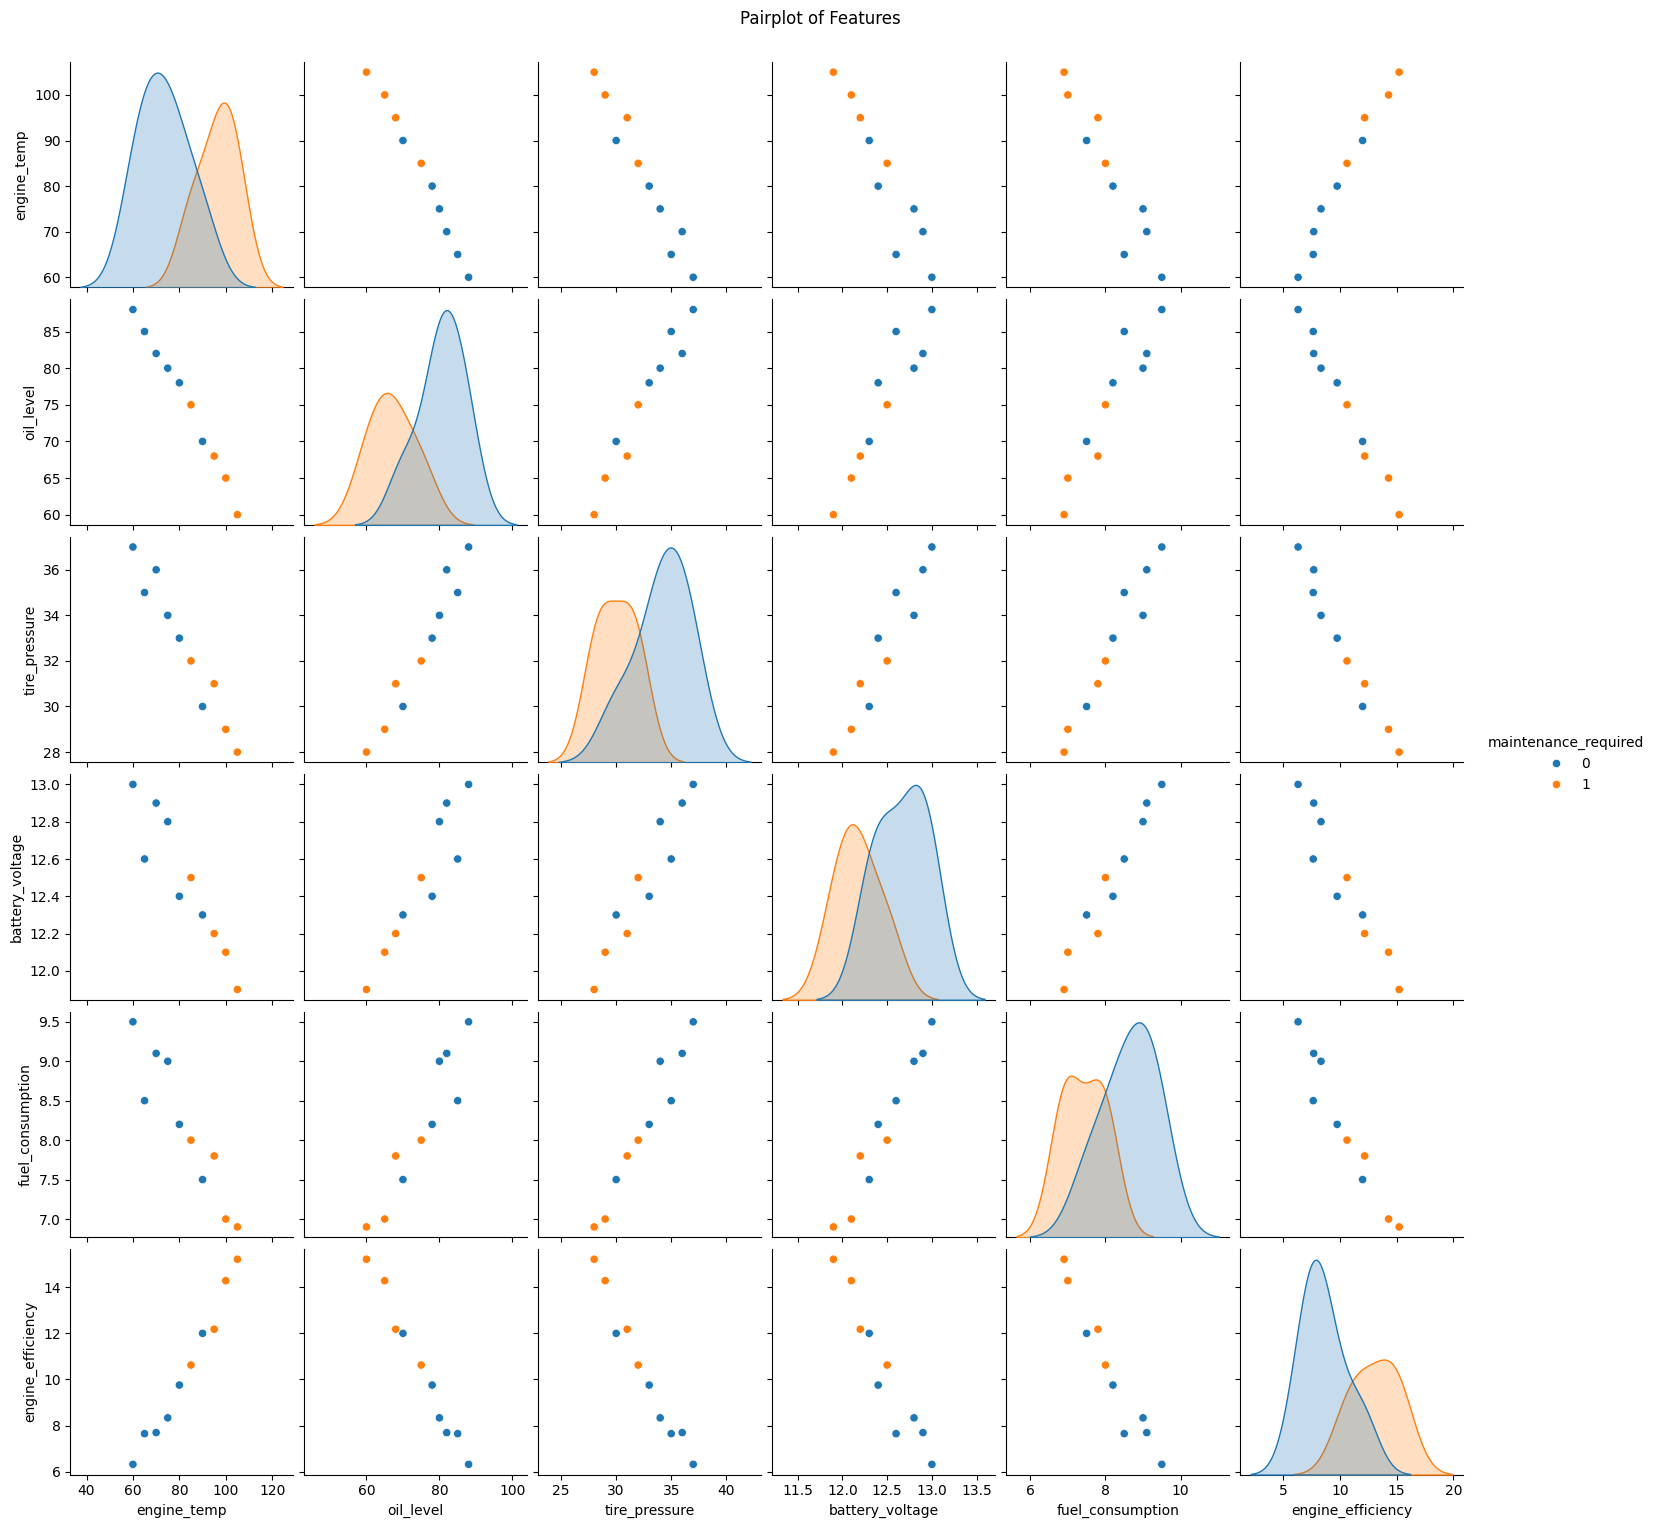

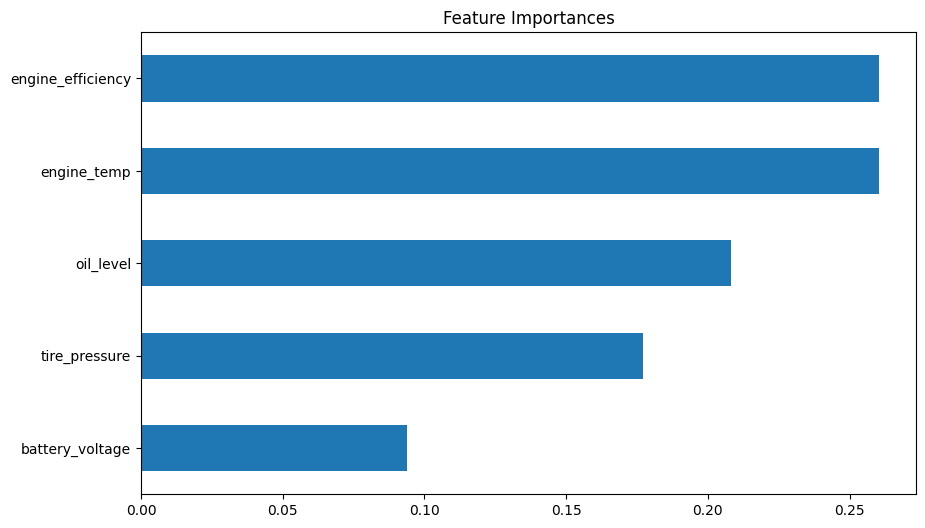

In [ ]:
# Step 5: Visualize the data
# Plot feature distributions
plt.figure(figsize=(12, 8))
for i, column in enumerate(features.columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=data, x=column, hue='maintenance_required', multiple='stack', kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# Plot pairplot of features
sns.pairplot(data, hue='maintenance_required', diag_kind='kde')
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

# Plot feature importance
feature_importances = pd.Series(model.feature_importances_, index=features.columns)
plt.figure(figsize=(10, 6))
feature_importances.sort_values().plot(kind='barh')
plt.title('Feature Importances')
plt.show()